TEMPERATURE FORECAST

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [1]:
#Importing necessary libraries-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [5]:
#Random sample
data.sample(12)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5264     15.0  24-07-2016          29.8          26.6    65.331497   
809      10.0  01-08-2013          31.5          22.8    71.054901   
4767     18.0  04-07-2016          25.1          21.7    87.208733   
7017     18.0  01-08-2017          33.4          23.6    53.115238   
2453      4.0  05-08-2014          29.6          25.2    83.210304   
4813     14.0  06-07-2016          26.3          20.6    58.702740   
5146     22.0  19-07-2016          32.3          21.2    44.931583   
3162     13.0  02-07-2015          29.1          20.8    28.348621   
6335     11.0  05-07-2017          32.9          23.6    46.138000   
378       4.0  15-07-2013          29.3          23.7    85.438110   
2334     10.0  31-07-2014          32.7          23.6    45.350189   
4089     15.0  08-08-2015          33.4          23.4    52.015244   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS   LDAPS_LH  \
5264    91.591812         29.681767         26.640641   5.043136  44.792182   
809     89.198135         28.689486         25.347911   5.872290  50.400824   
4767    94.576149         26.189083         20.684357   9.382695  32.291211   
7017    85.647018         33.809423         26.210106   5.469055  99.664244   
2453    95.849571         25.652330         23.126460   3.380252  36.727123   
4813    88.776718         26.741276         21.480125   4.940267   9.163588   
5146    82.530289         32.500829         23.793879   5.736941  85.212326   
3162    75.986259         28.667081         19.106201   8.079057  34.722476   
6335    86.339378         33.737148         24.501224   5.783067  88.949009   
378     98.019722         26.851137         23.866656  12.086392  40.993702   
2334    90.017082         32.551793         24.085186   6.114846  72.795640   
4089    89.650787         30.468812         24.182050   5.654867  32.907940   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
5264  ...    0.118920    0.397953    0.000000  37.5507  126.937   30.0464   
809   ...    0.583260    0.173792    0.000000  37.4562  126.955  208.5070   
4767  ...    0.354244    0.673450    0.725338  37.4832  127.024   56.4448   
7017  ...    0.000000    0.000000    4.746714  37.4832  127.024   56.4448   
2453  ...    0.047961    0.132838    0.072772  37.6450  127.022   45.7160   
4813  ...    0.007317    0.000000    0.000000  37.4967  126.927   30.9680   
5146  ...    0.000000    0.000000    0.000000  37.5102  127.086   21.9668   
3162  ...    0.000000    0.000000    0.000000  37.5776  127.083   59.8324   
6335  ...    0.000000    0.913639    0.369057  37.5372  127.085   28.7000   
378   ...    0.000000    0.112149    0.000000  37.6450  127.022   45.7160   
2334  ...    0.000000    0.000000    0.000000  37.4562  126.955  208.5070   
4089  ...    0.000000    0.000000    0.000000  37.5507  126.937   30.0464   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
5264  0.8552      5558.664551       32.5       25.8  
809   5.1782      5379.565918       30.2       24.4  
4767  1.2313      5831.559082       27.1       21.1  
7017  1.2313      5389.576660       34.4       26.0  
2453  2.5348      5288.587402       26.8       22.9  
4813  0.6180      5807.829102       29.0       20.1  
5146  0.1332      5632.534180       32.9       23.9  
3162  2.6865      5849.480469       28.0       19.7  
6335  0.6233      5831.660156       34.6       23.7  
378   2.5348      5714.666992       29.1       25.1  
2334  5.1782      5405.707520       33.5       21.7  
4089  0.8552      5222.419434       31.3       24.1  

[12 rows x 25 columns]

In [6]:
#Checking shape of data
data.shape

(7752, 25)

In [7]:
#Checking datatype and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


DATATYPE-

Except date, all other columns have float data type. Date has object data type which can be converted into numerical data by adding new date columns day, month and yearwise.

A lot of columns have null values. 

In [9]:
#Let's confirm the exact null values
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

NULLS-

Except lat,lon,DEM,Slope and Solar radiation all other variables have missing/null values. We need to handle the nulls at a later stage.

In [11]:
data.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

Observations-

1. There are null values present in a lot of variables.

2. The standard deviation range of 0.05 to 429 implies that the scale of distribution has a lot of variation.

3. Few variables like DEM, LDAPS_LH have high difference in 75% and max which clearly indicated the presence of outliers.

4. The distribution for most of the features seem to be normal.

In [13]:
#Checking unique vales
data['lat'].unique()

array([37.6046, 37.5776, 37.645 , 37.5507, 37.5102, 37.4697, 37.4967,
       37.4562, 37.5372, 37.6181, 37.4832, 37.5237])

In [14]:
data['lon'].unique()

array([126.991, 127.032, 127.058, 127.022, 127.135, 127.042, 126.838,
       126.91 , 126.826, 126.955, 127.085, 126.988, 127.083, 126.927,
       126.937, 126.995, 127.099, 127.024, 126.938, 127.004, 127.04 ,
       127.086, 126.891, 126.909, 126.97 ])

In [18]:
data['Next_Tmin'].nunique()

157

In [19]:
data['Next_Tmax'].nunique()

183

In [20]:
data['Solar radiation'].nunique()

1575

In [21]:
data['Present_Tmax'].nunique()

167

In [23]:
data['DEM'].unique()

array([212.335 ,  44.7624,  33.3068,  45.716 ,  35.038 ,  54.6384,
        12.37  ,  52.518 ,  50.9312, 208.507 ,  28.7   , 132.118 ,
        59.8324,  30.968 ,  30.0464,  82.2912,  53.4712,  56.4448,
        75.0924, 146.554 ,  26.298 ,  21.9668,  15.5876,  17.2956,
        19.5844])

In [24]:
data['Slope'].unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])

In [4]:
#Handling the Object type column- Date
import datetime as dt

In [5]:
data['Date']=pd.to_datetime(data['Date'])

In [6]:
data.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [7]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [8]:
data.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2  30.0   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5  30.0   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9  30.0   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3  30.0   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5  30.0   

   Month    Year  
0    6.0  2013.0  
1    6.0  2013.0  
2    6.0  2013.0  
3    6.0  2013.0  
4    6.0  2013.0  

[5 rows x 28 columns]

In [9]:
data.drop(columns=['Date'], axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


All the variables now have float data type. 

The object datatype issue with date column has been resolved.

In [11]:
#Handling nulls-
from sklearn.impute import SimpleImputer

In [12]:
data.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

In [13]:
si=SimpleImputer()

In [14]:
list=['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin','Day','Month','Year']

In [15]:
for i in list:
    data[i]=si.fit_transform(data[i].values.reshape(-1,1))

In [16]:
data.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

There are no null values now for any of the variables. 

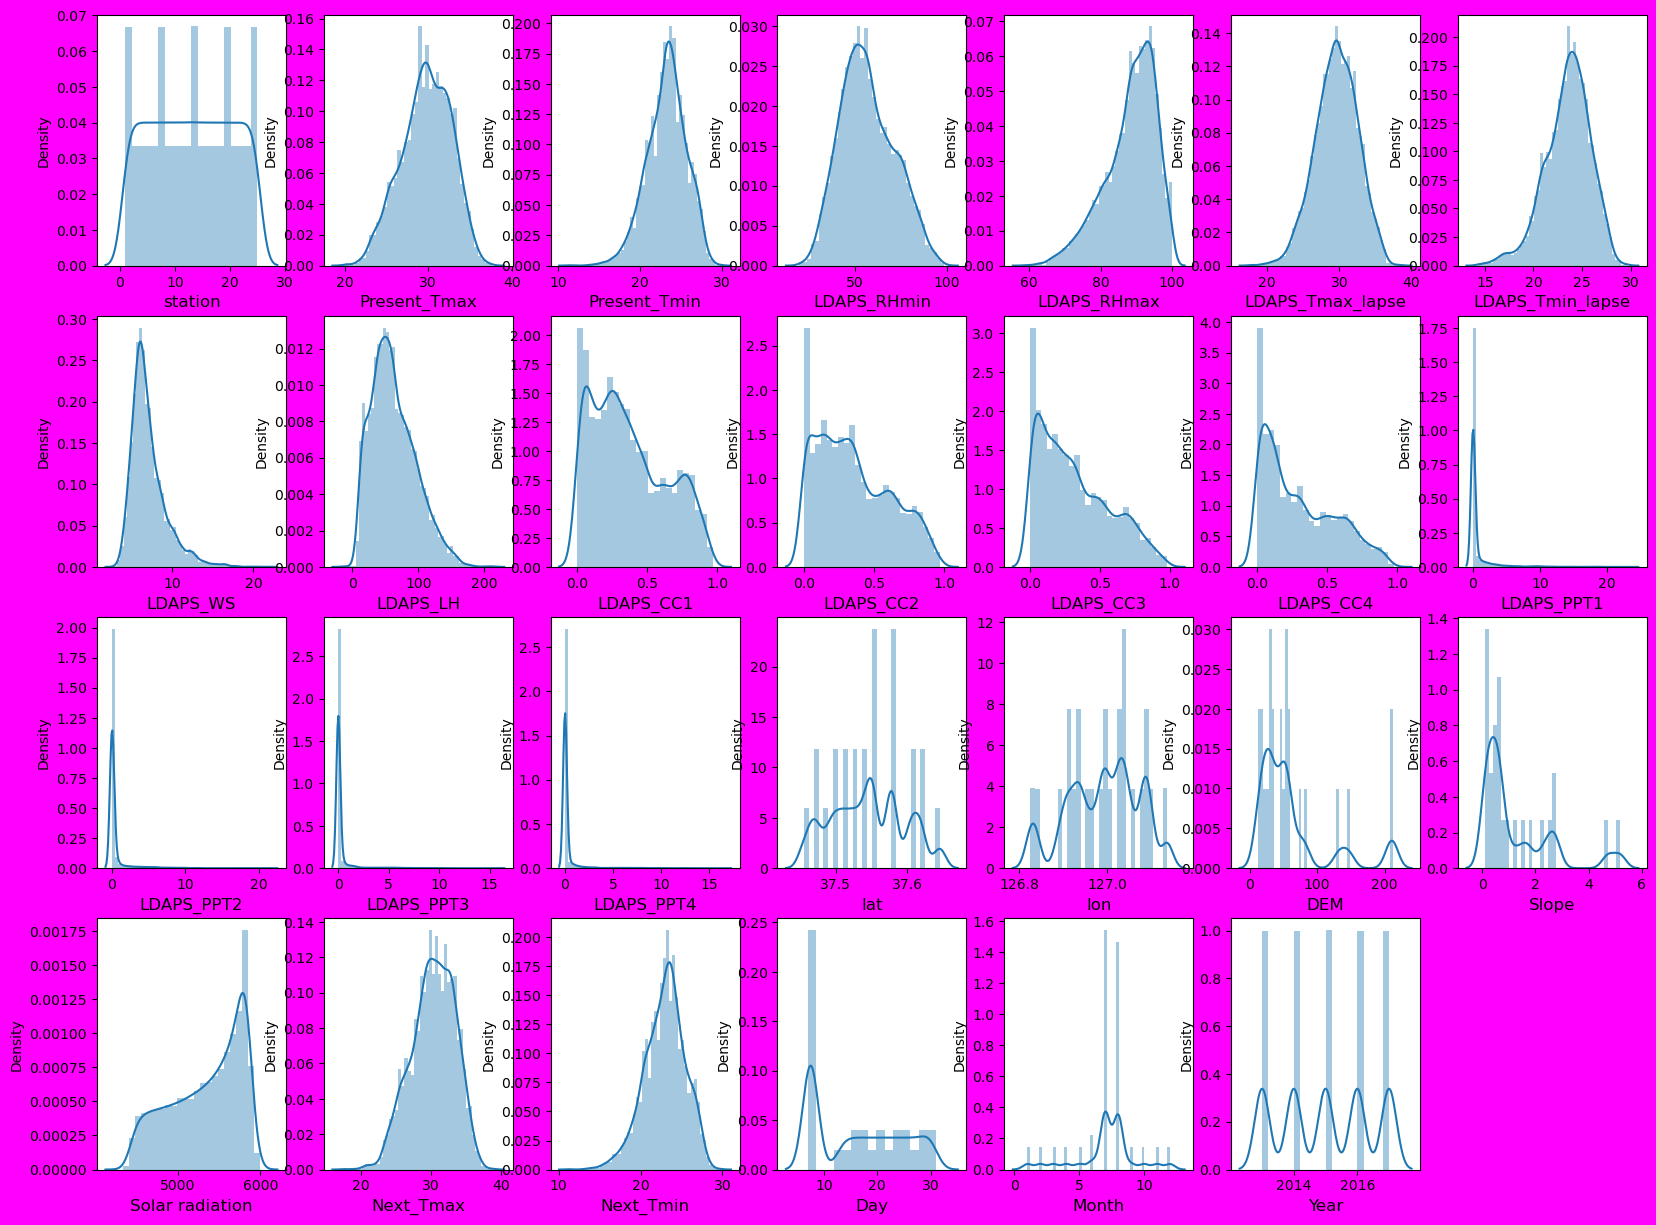

In [57]:
#Let's check distribution of data-
plt.figure(figsize=(20,15), facecolor='magenta')
plotnumber=1

for column in data:
    if plotnumber<=27:
        ax=plt.subplot(4,7, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()


Columns like LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 and LDAPS_WS are highly skewed to the left.

Other columns like LDAPS_WS, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3 and LDAPS_CC4 also have slight skewness to the left

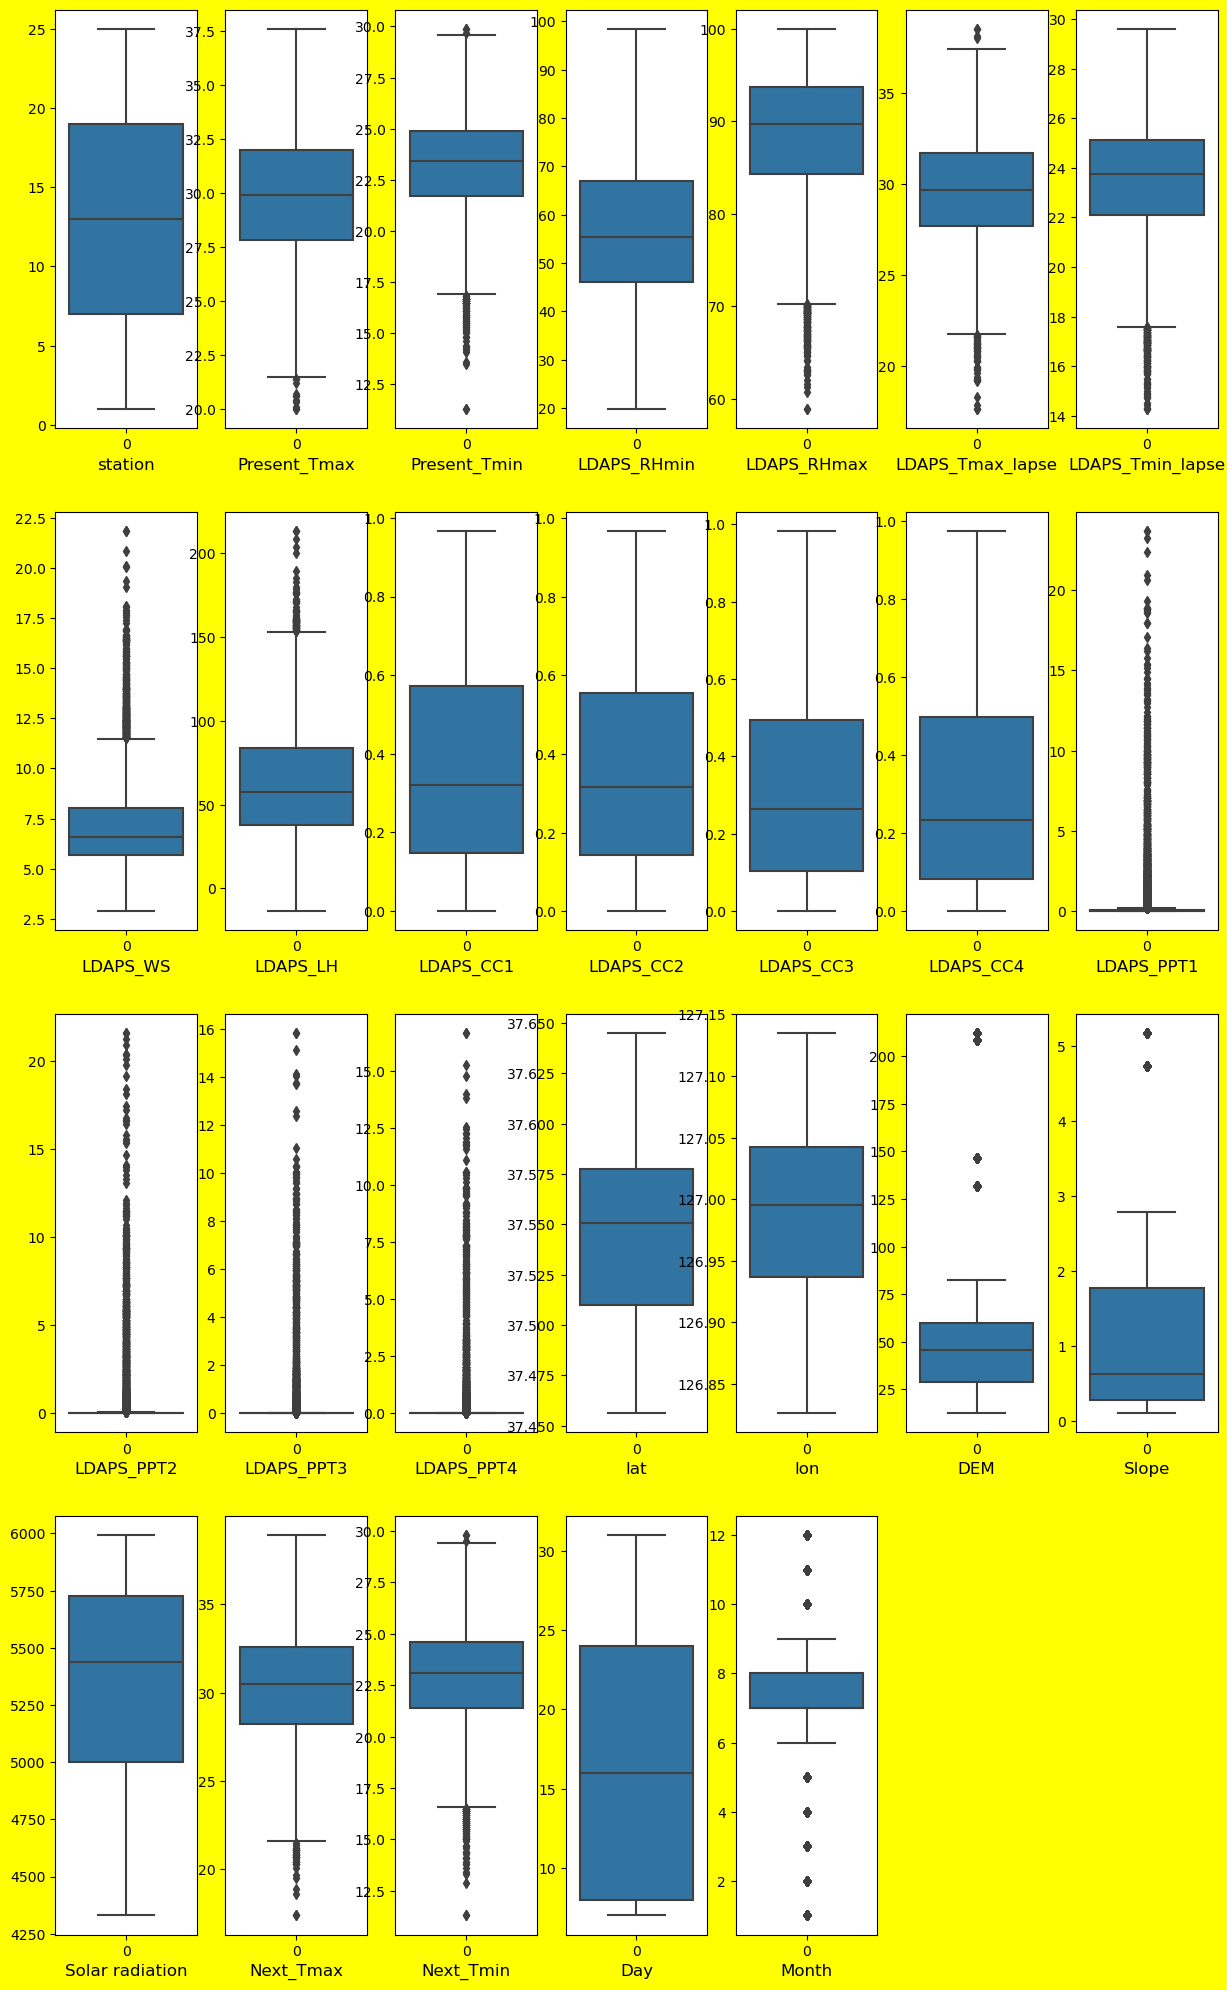

In [58]:
#Checking for outliers
plt.figure(figsize=(15,25), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<27:
        ax=plt.subplot(4,7, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()    

Variables like Present_Tmax, Present_Tmin, LDAPS_RHmax and LDAPS_Tmin_lapse have outliers present in the lower side while variables like LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 , LDAPS_PPT1, DEM and Slope have outliers on the upper side

Present_Tmin, Month and LDAPS_Tmax_lapse have outliers both on upper and lower side.

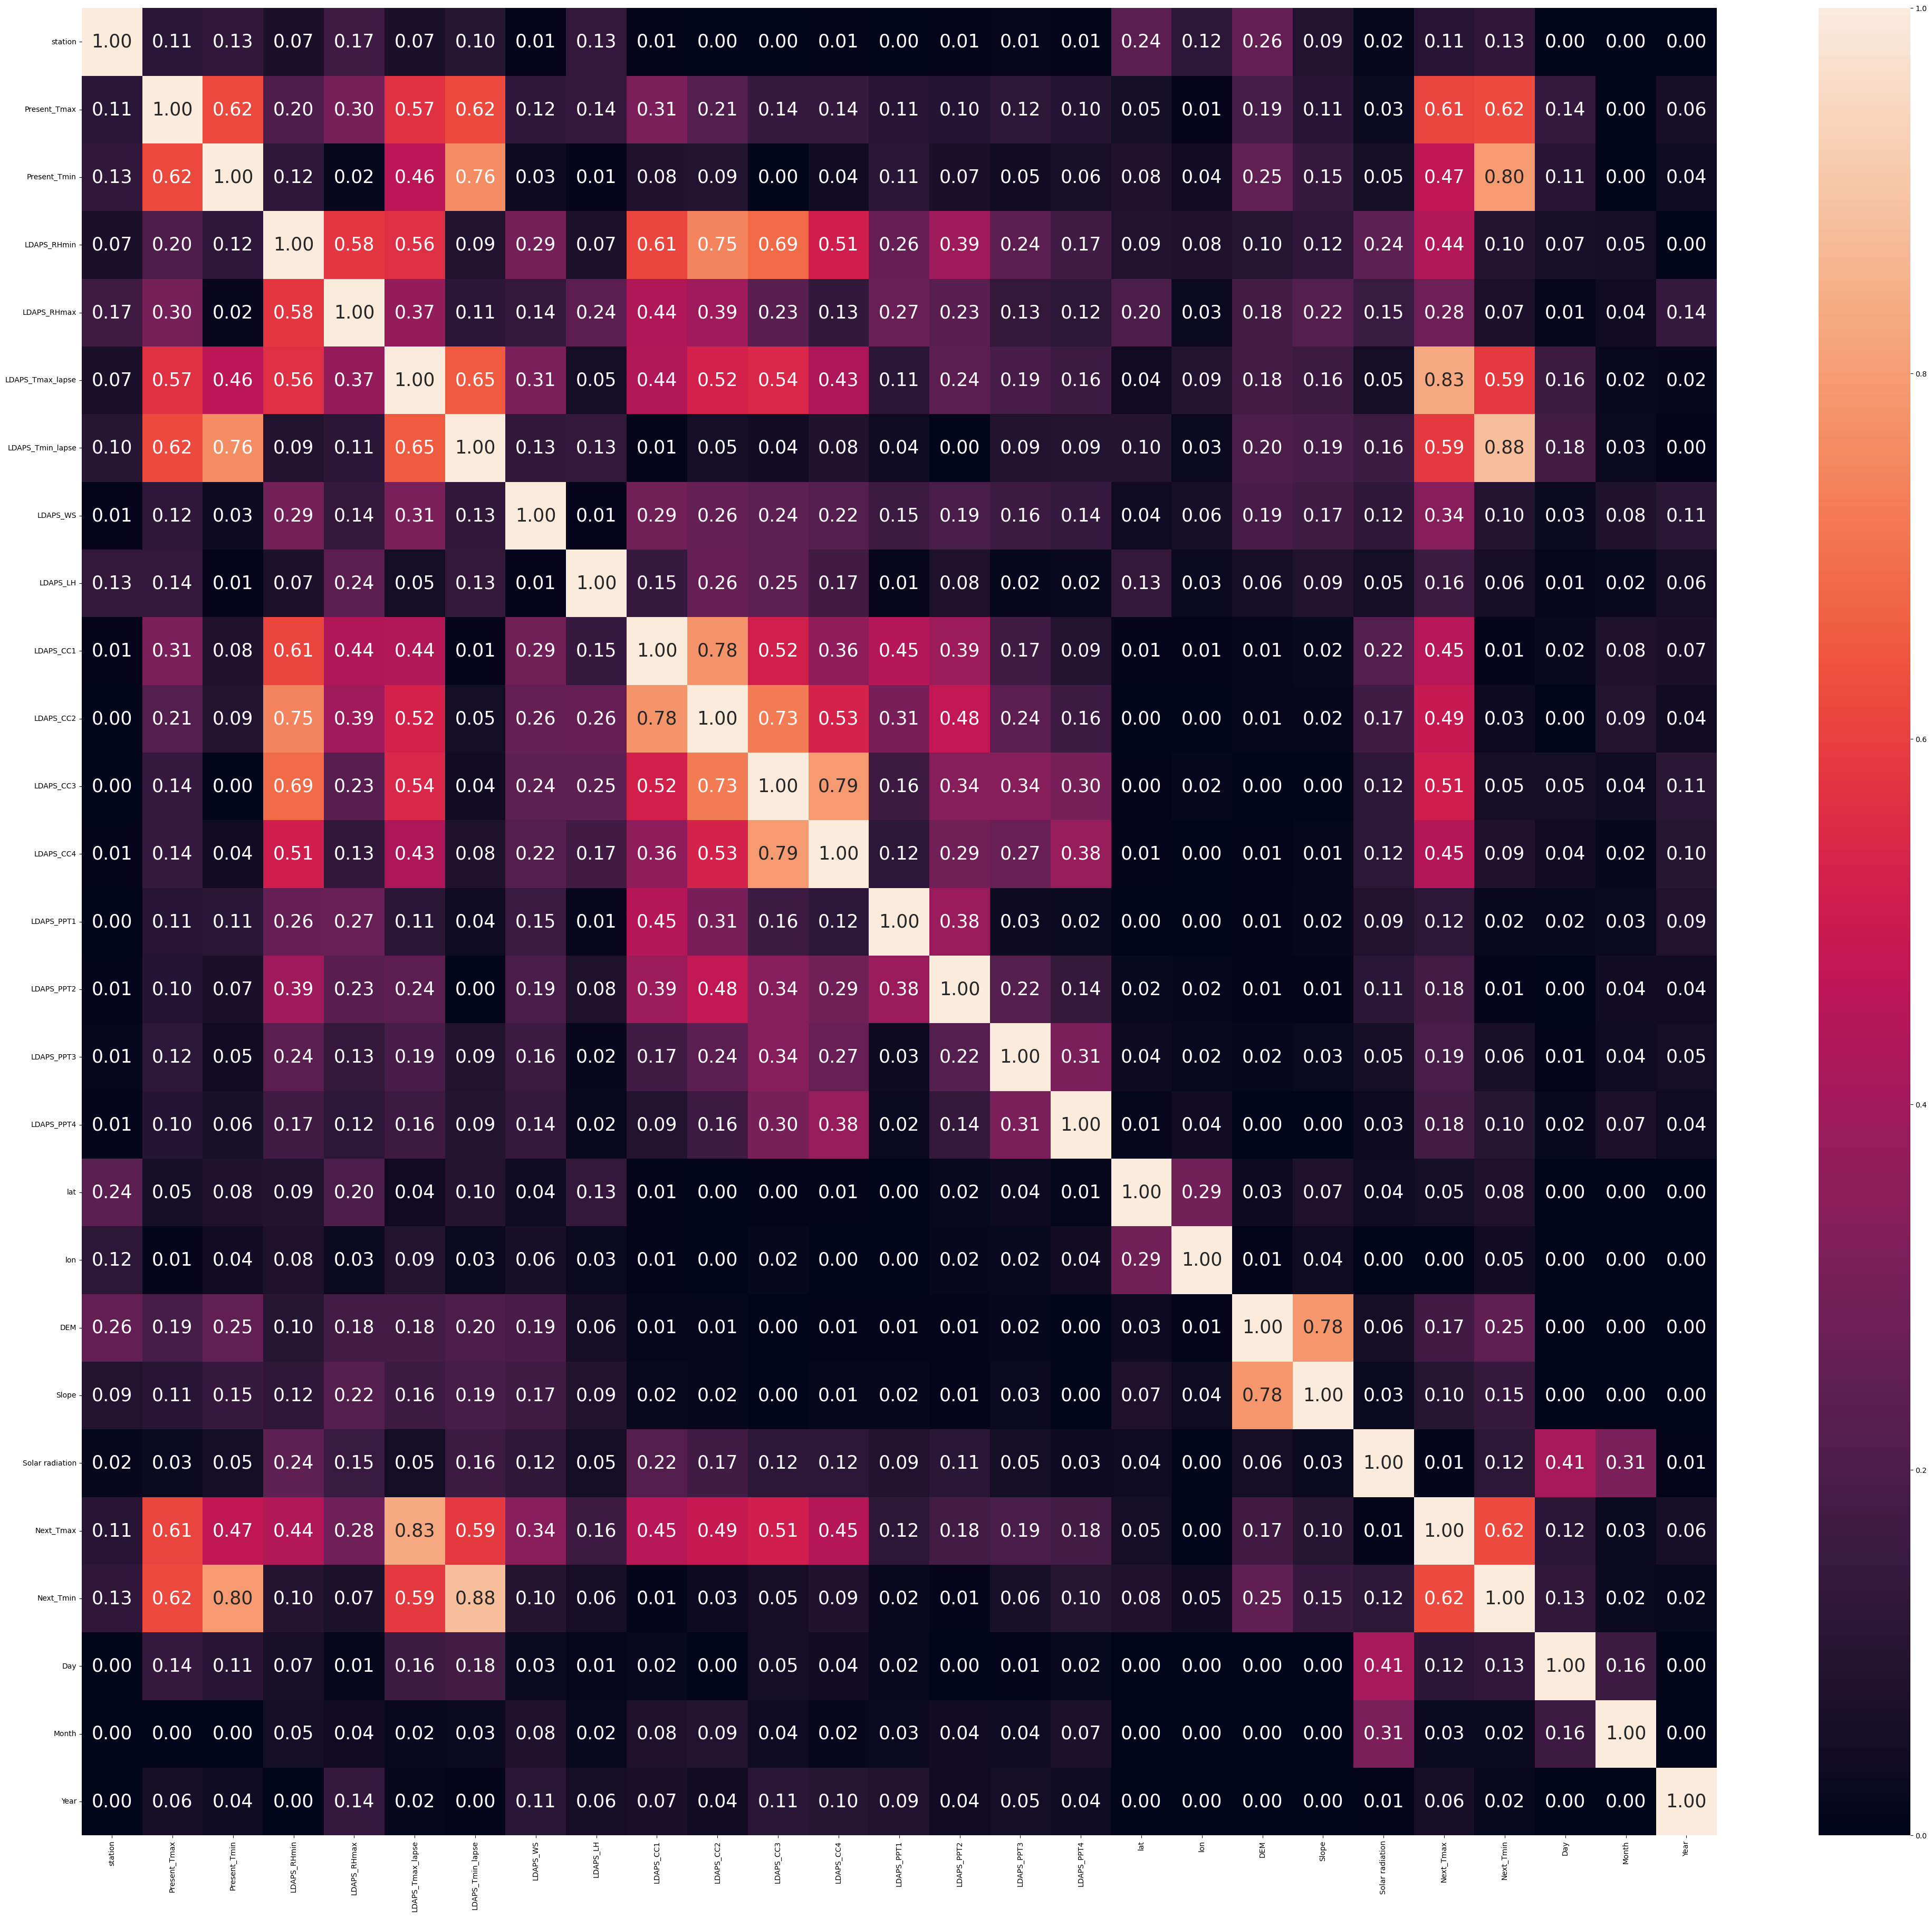

In [63]:
#Checking correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(50,45))
sns.heatmap(data_corr, annot=True, fmt='0.2f', annot_kws={'size':25})
plt.show()

Observations-

1.DEM and Slope seem to be highly correlated.

2.LDAPS_CC4 and LDAPS_CC3 and LDAPS_CC1 and LDAPS_CC2 seem to be correlated as well.

3.Features like Present_Tmax and Present_Tmin, LDAPS_Tmax_lapse and LDAPS_Tmix_lapse seem to have huge impact on the label/high correlation with the label (Next_Tmin and Next_Tmax).

4.There is a strong positive correlation between Next_Tmin and LDAPS_Tmin_lapse, indicating that the prediction of the next minimum temperature is influenced by the modeled minimum temperature using LDAPS.

5.There is a strong positive correlation between Next_Tmax and LDAPS_Tmax_lapse, indicating that the prediction of the next maximum temperature is influenced by the modeled maximum temperature using LDAPS. 

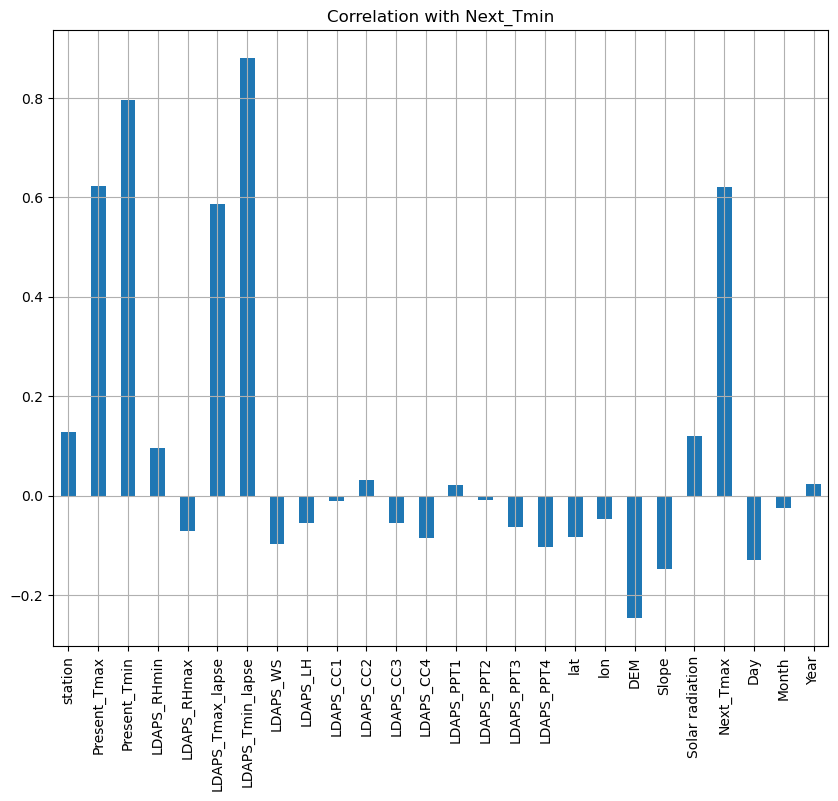

In [64]:
#Let's check the impact of each feature on the label(Primary fuel)
data.drop('Next_Tmin', axis=1).corrwith(data.Next_Tmin).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with Next_Tmin')
plt.show()

Features like LDAPS_CC1 and LDAPS_PPT2 seem to have least correlation with the label Next_Tmin.


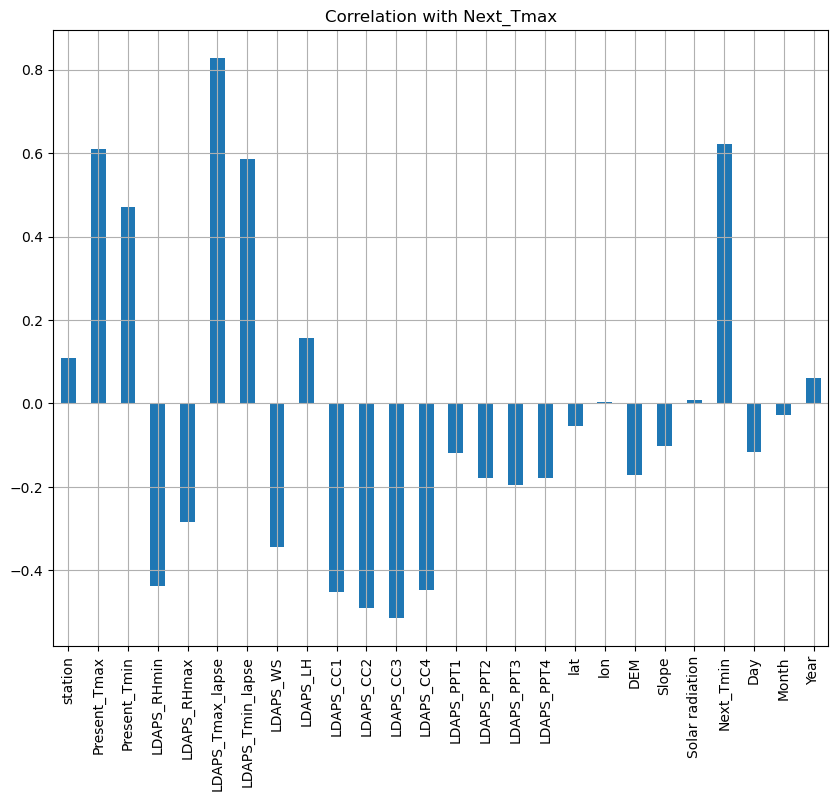

In [65]:
#Let's check the impact of each feature on the label(Primary fuel)
data.drop('Next_Tmax', axis=1).corrwith(data.Next_Tmax).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with Next_Tmax')
plt.show()

Features like lon, and Solar radiation seem to be least correlated with the label Next_Tmax

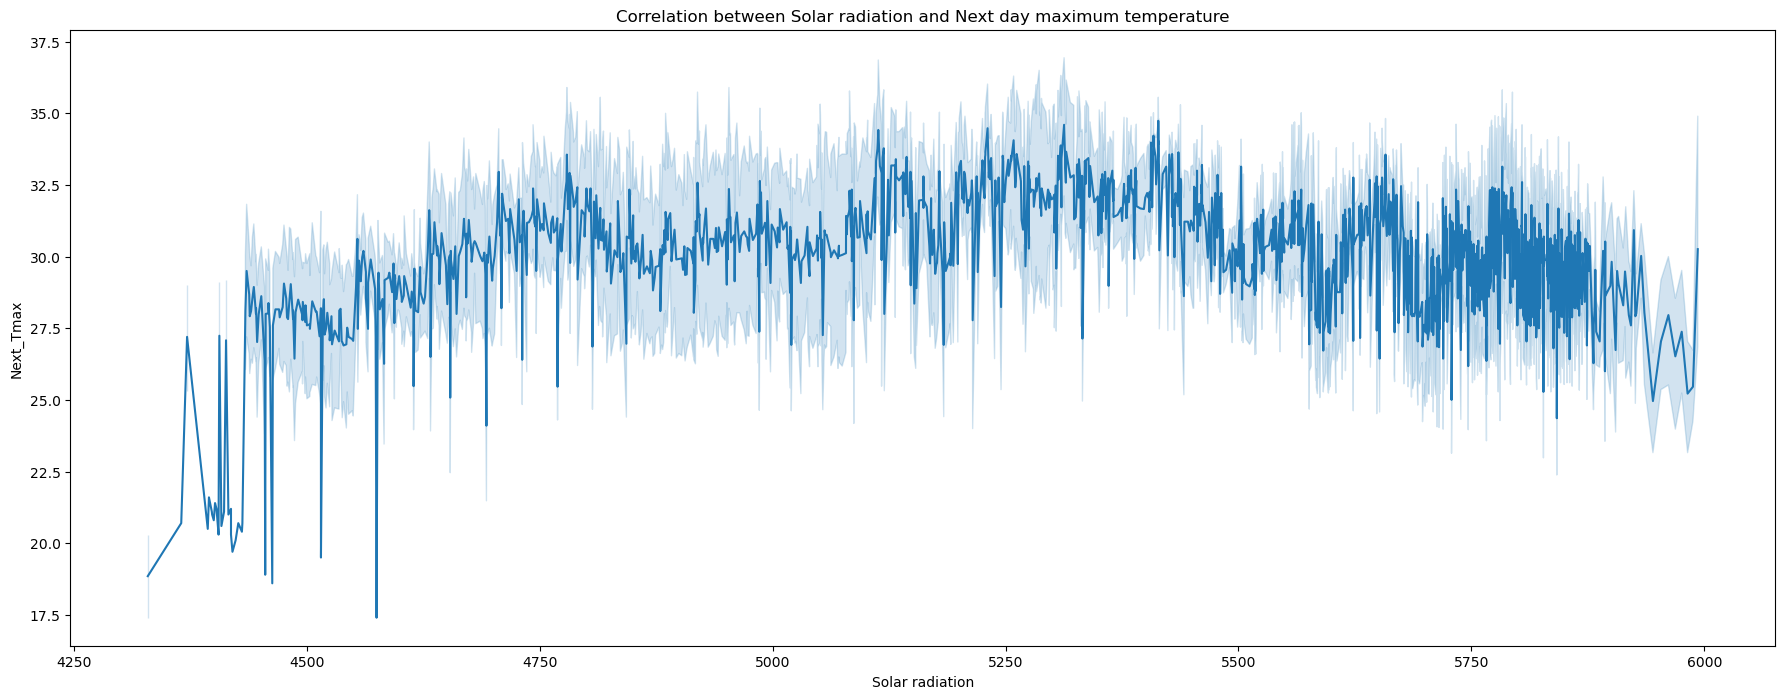

In [70]:
#Correlation between Solar radiation and Next day maximum temperature
plt.figure(figsize=(22,8))
sns.lineplot(x='Solar radiation', y='Next_Tmax', data=data)
plt.title('Correlation between Solar radiation and Next day maximum temperature')
plt.show()

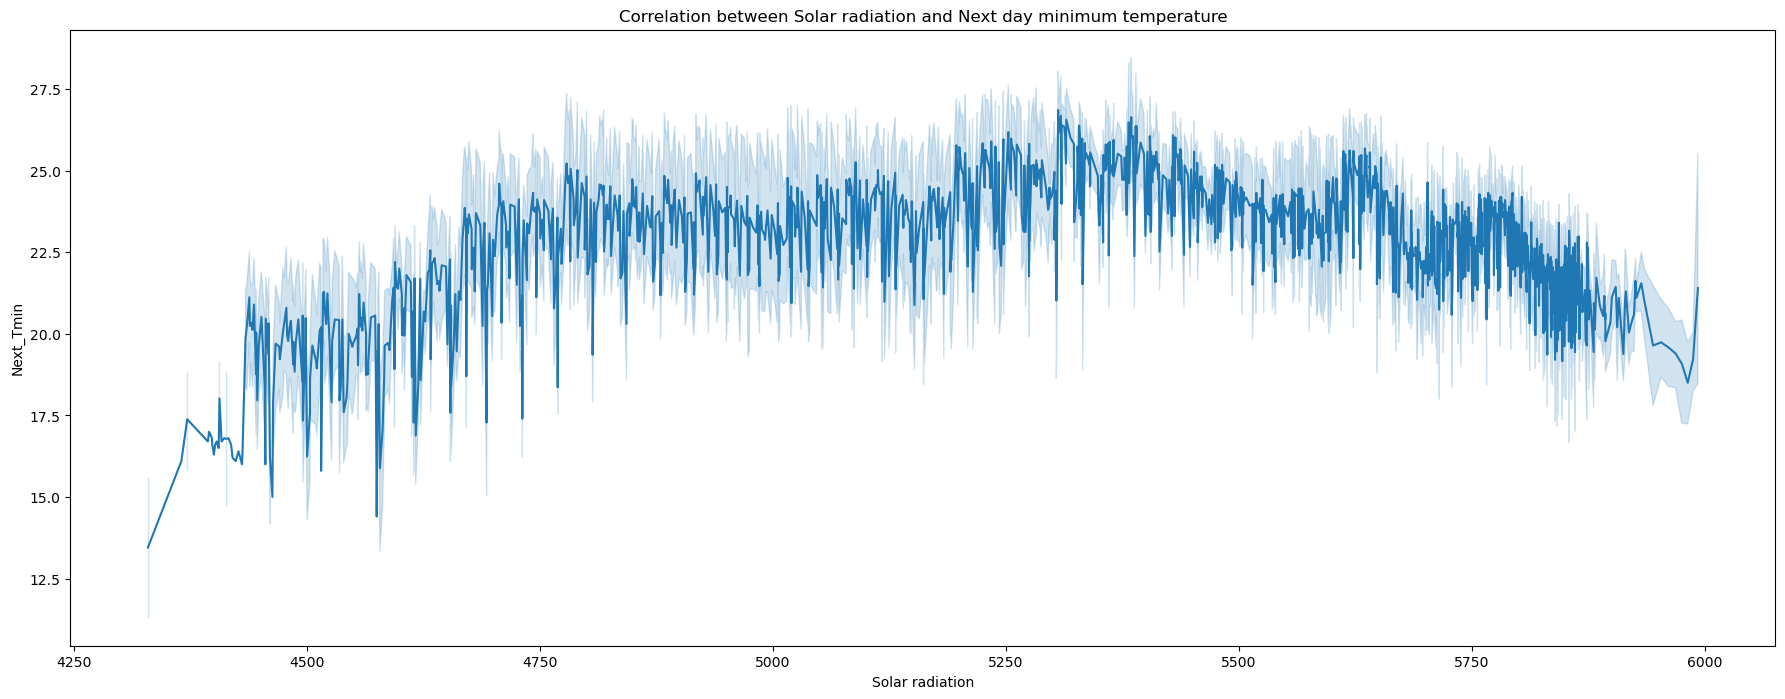

In [71]:
#Correlation between Solar radiation and Next day minimum temperatureplt.figure(figsize=(22,8))
sns.lineplot(x='Solar radiation', y='Next_Tmin', data=data)
plt.title('Correlation between Solar radiation and Next day minimum temperature')
plt.show()

We can clearly see the correlation of Solar radiation is higher for Next_Tmax than for Next_Tmin. 

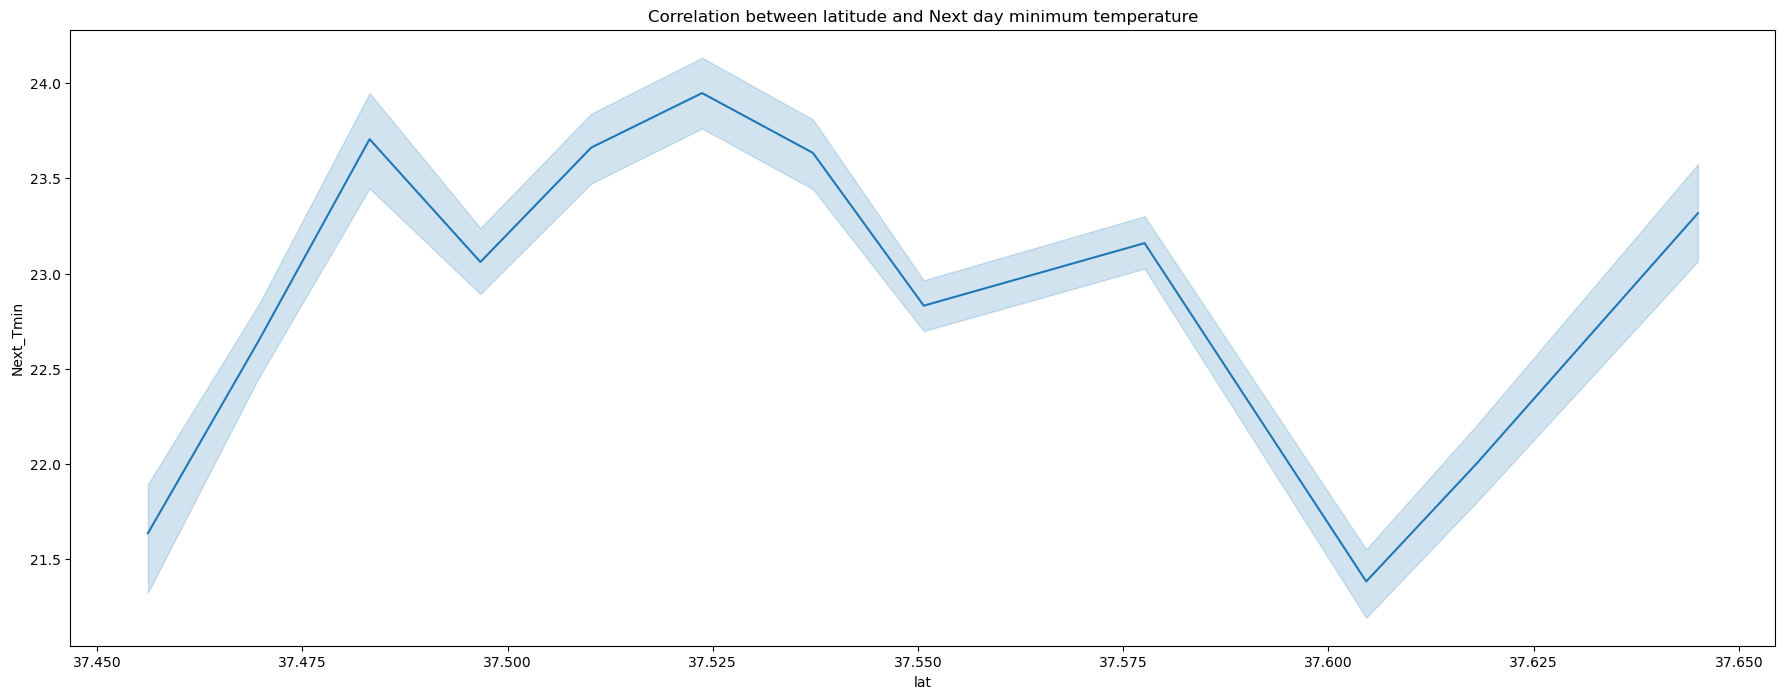

In [74]:
#Correlation between latitude and Next day maximum temperature
plt.figure(figsize=(22,8))
sns.lineplot(x='lat', y='Next_Tmin', data=data)
plt.title('Correlation between latitude and Next day minimum temperature')
plt.show()

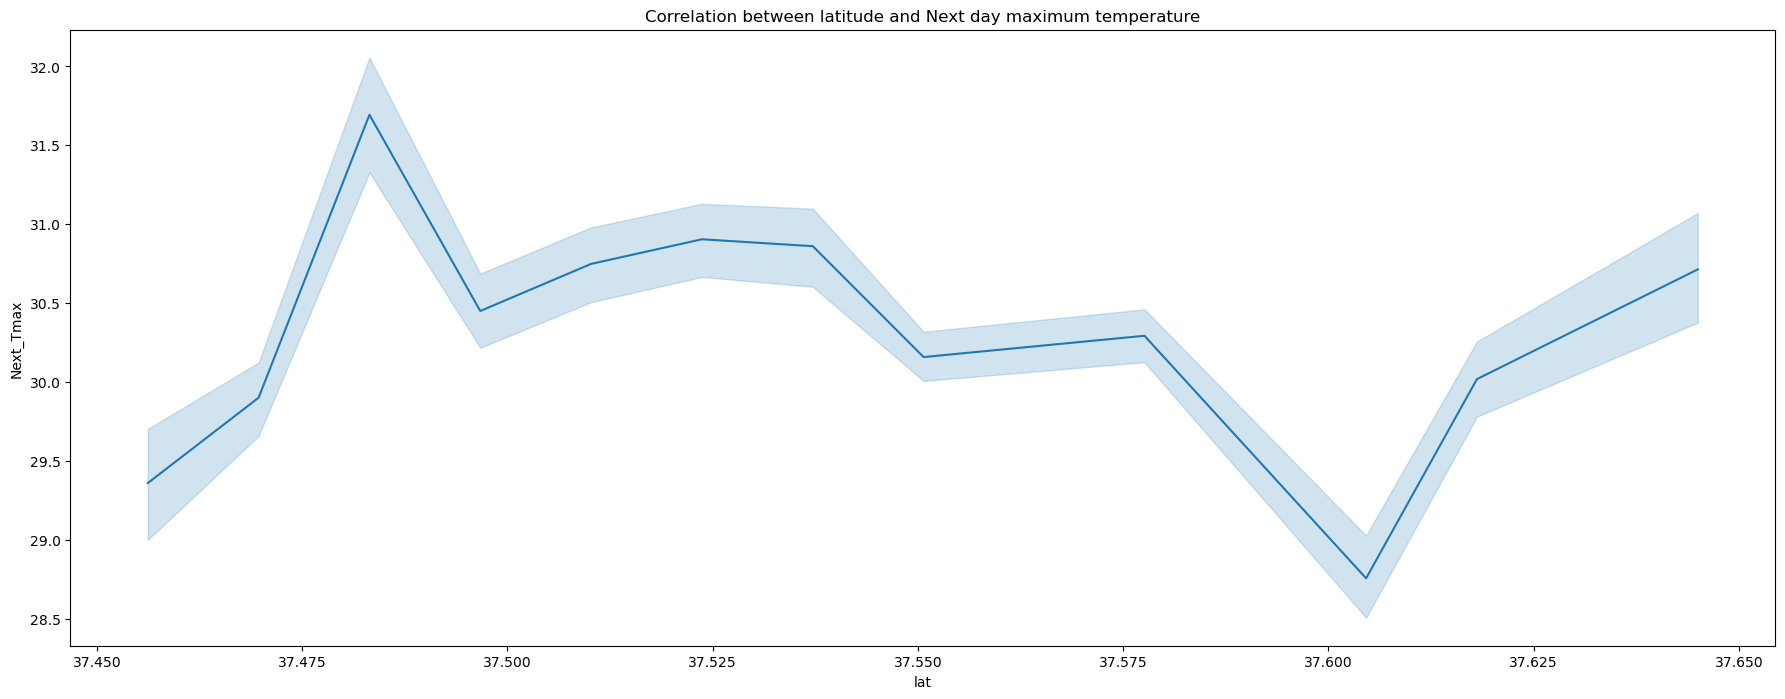

In [75]:
plt.figure(figsize=(22,8))
sns.lineplot(x='lat', y='Next_Tmax', data=data)
plt.title('Correlation between latitude and Next day maximum temperature')
plt.show()

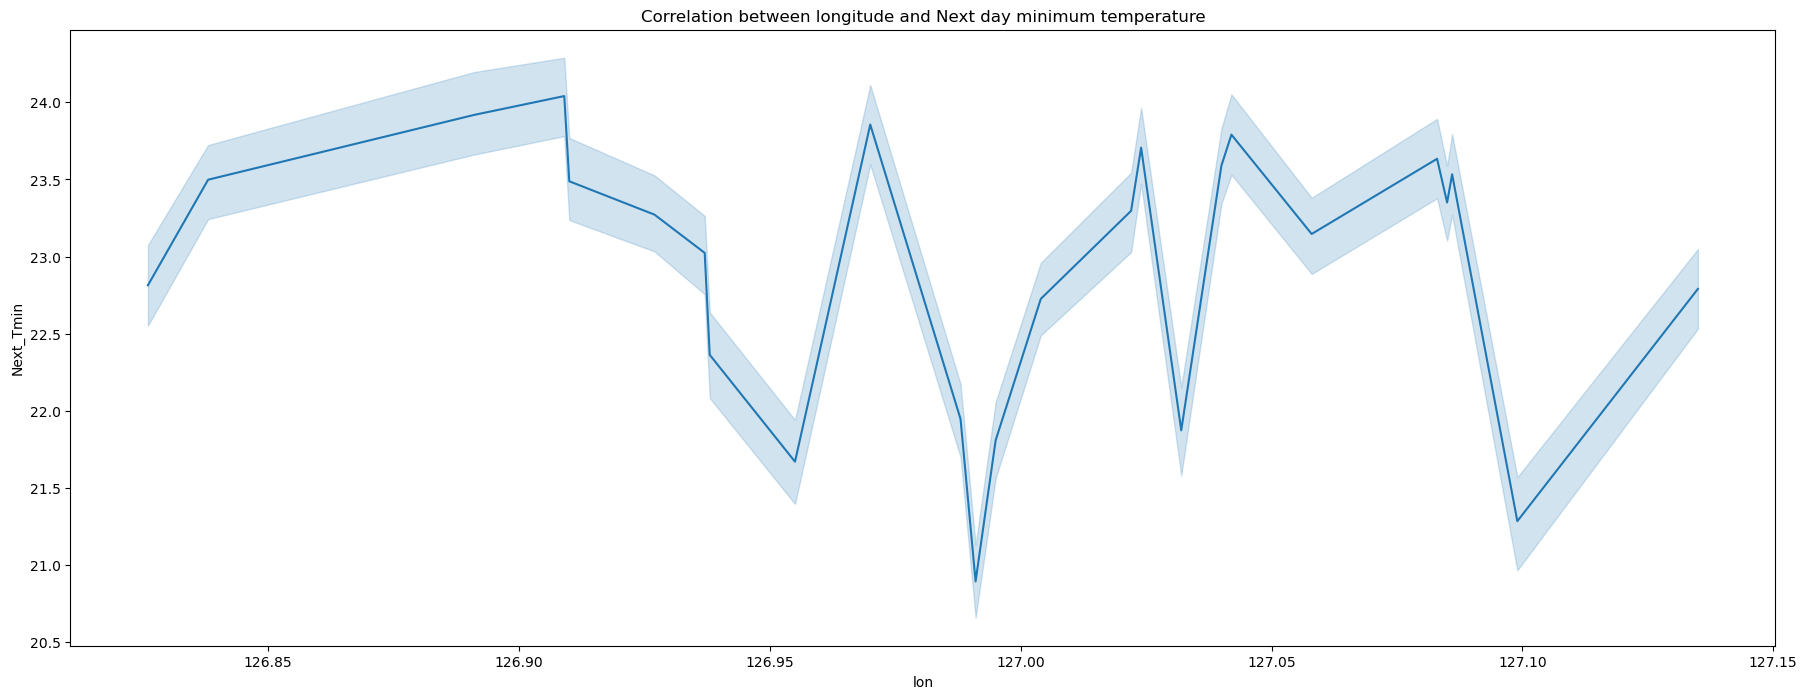

In [77]:
#Correlation between longitude and Next day minimum temperature
plt.figure(figsize=(22,8))
sns.lineplot(x='lon', y='Next_Tmin', data=data)
plt.title('Correlation between longitude and Next day minimum temperature')
plt.show()

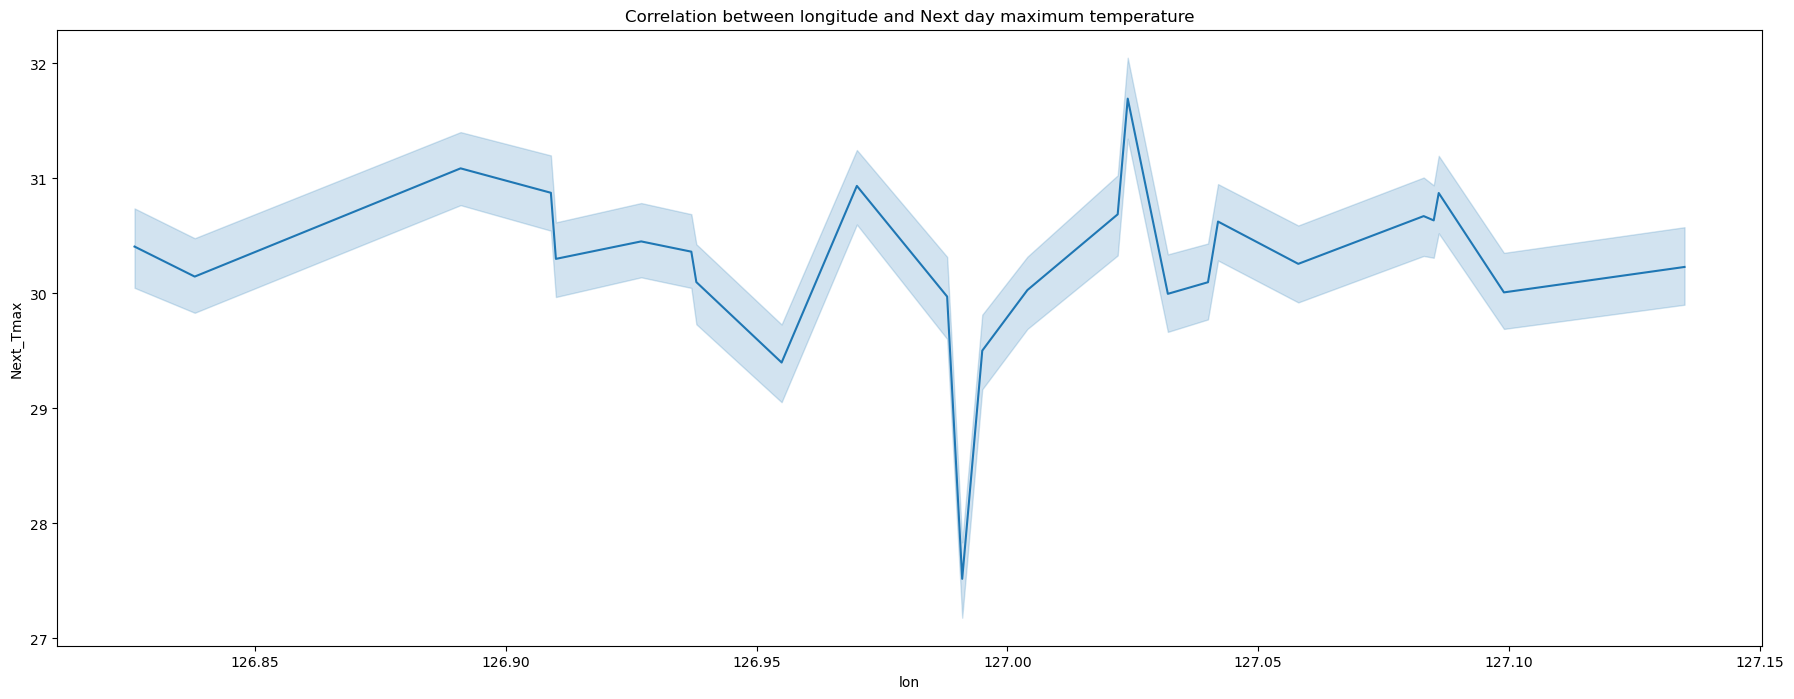

In [83]:
#Correlation between longitude and Next day maximum temperature
plt.figure(figsize=(22,8))
sns.lineplot(x='lon', y='Next_Tmax', data=data)
plt.title('Correlation between longitude and Next day maximum temperature')
plt.show()

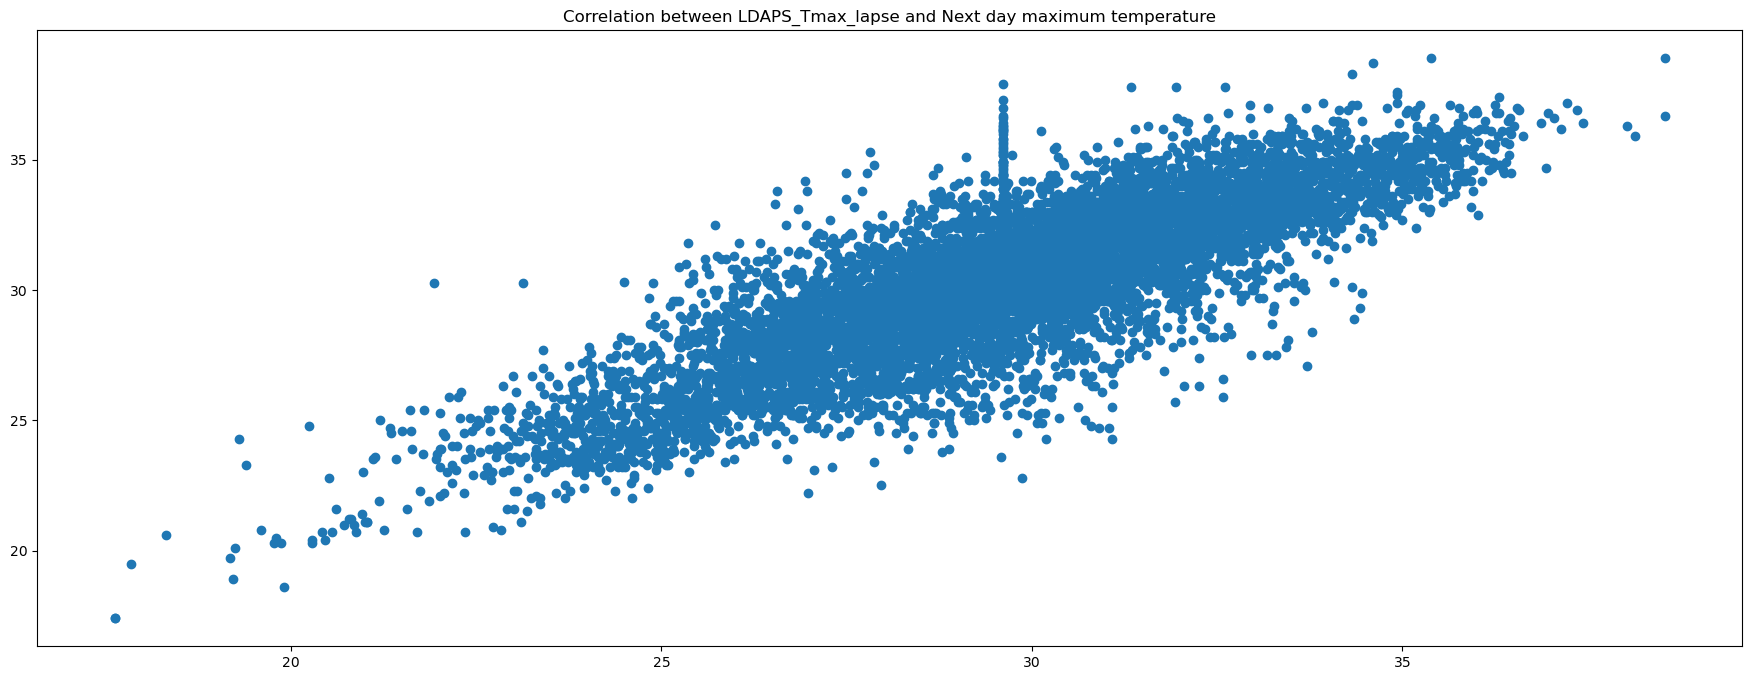

In [84]:
#Correlation between LDAPS_Tmax_lapse and Next day maximum temperature
plt.figure(figsize=(22,8))
plt.scatter(x=data['LDAPS_Tmax_lapse'],y=data['Next_Tmax'])
plt.title('Correlation between LDAPS_Tmax_lapse and Next day maximum temperature')
plt.show()

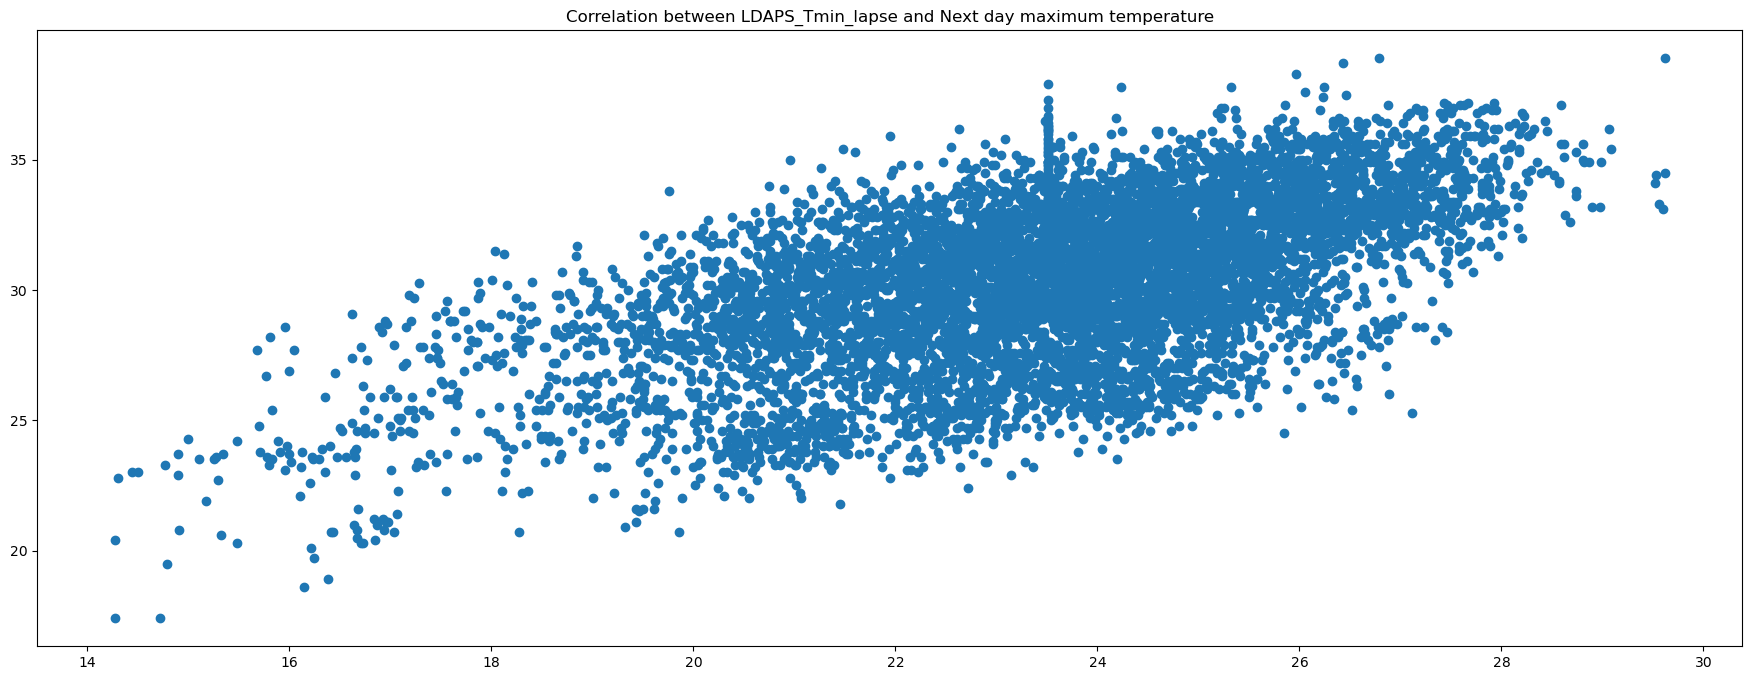

In [85]:
#Correlation between LDAPS_Tmin_lapse and Next day maximum temperature
plt.figure(figsize=(22,8))
plt.scatter(x=data['LDAPS_Tmin_lapse'],y=data['Next_Tmax'])
plt.title('Correlation between LDAPS_Tmin_lapse and Next day maximum temperature')
plt.show()

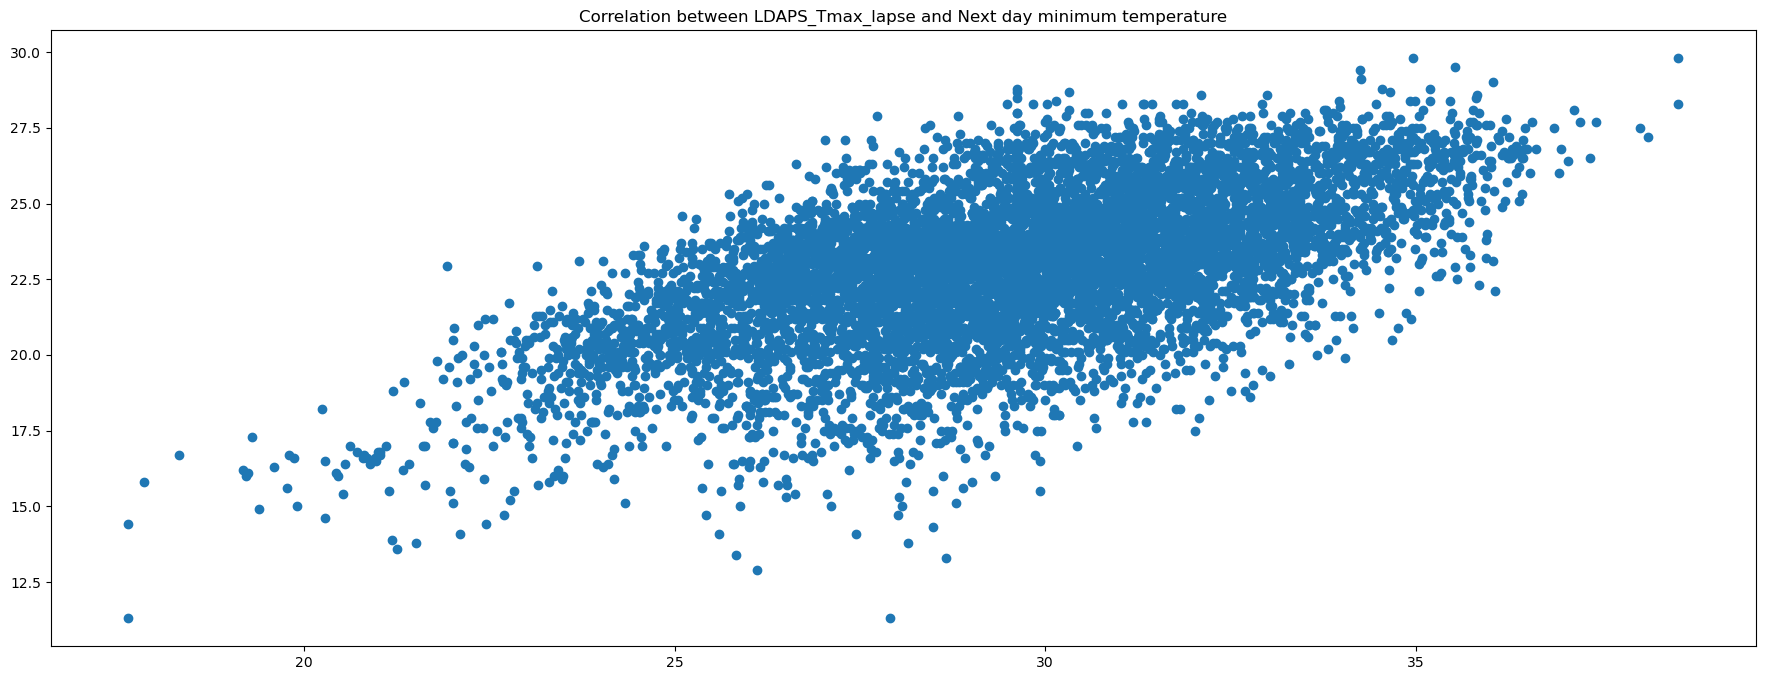

In [86]:
#Correlation between LDAPS_Tmax_lapse and Next day minimum temperature
plt.figure(figsize=(22,8))
plt.scatter(x=data['LDAPS_Tmax_lapse'],y=data['Next_Tmin'])
plt.title('Correlation between LDAPS_Tmax_lapse and Next day minimum temperature')
plt.show()

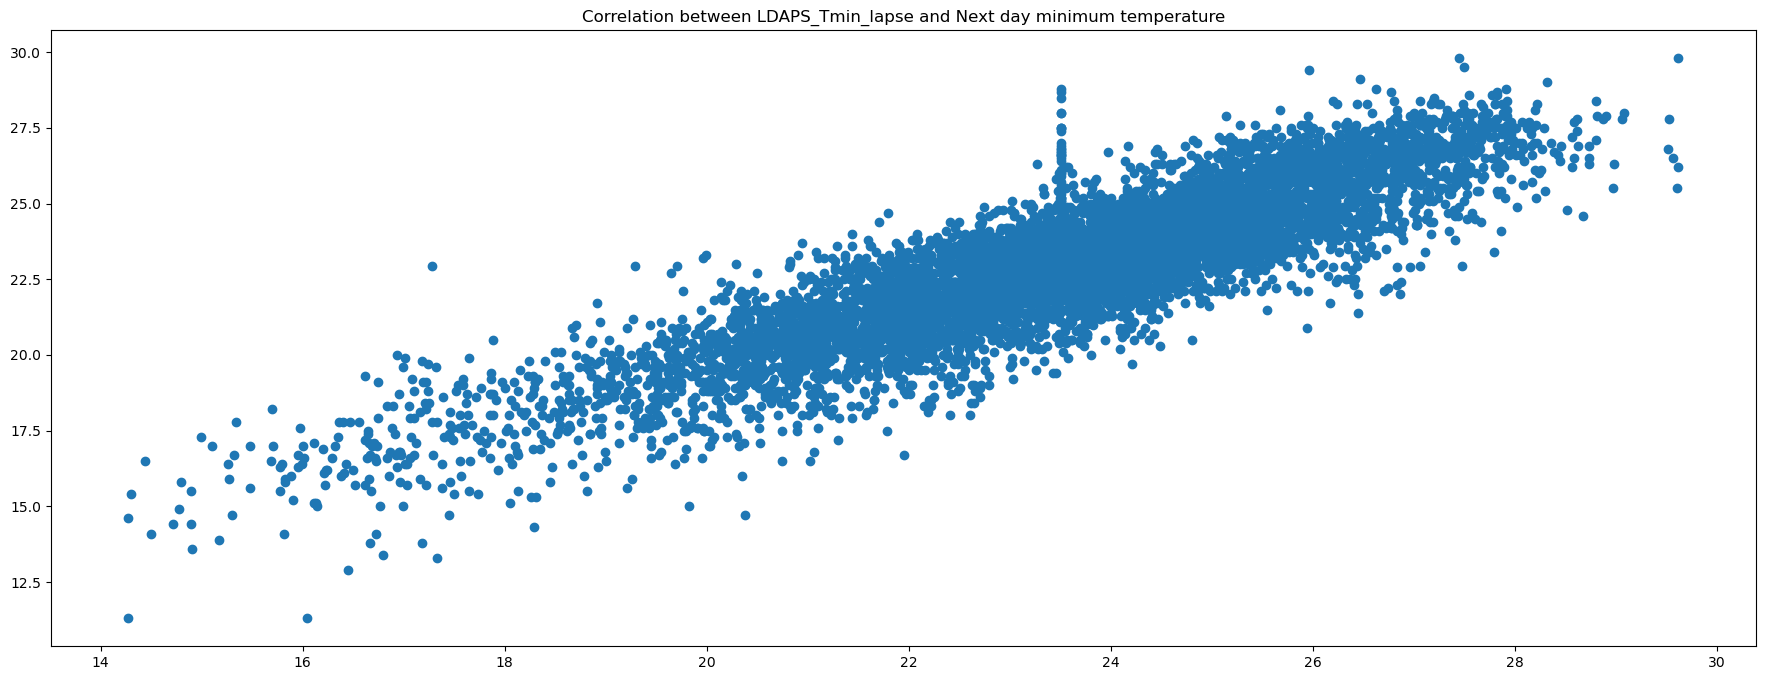

In [87]:
#Correlation between LDAPS_Tmin_lapse and Next day minimum temperatureplt.figure(figsize=(22,8))
plt.scatter(x=data['LDAPS_Tmin_lapse'],y=data['Next_Tmin'])
plt.title('Correlation between LDAPS_Tmin_lapse and Next day minimum temperature')
plt.show()

We can see a strong positive correlation between LDAPS_Tmin_lapse and LDAPS_Tmax_lapse with Next_Tmin and Next_Tmax

In [17]:
#Handling outliers
from scipy.stats import zscore

In [18]:
z=np.abs(zscore(data))
abs_z_score=np.abs(z)
filt_ent=(abs_z_score<3).all(axis=1)
data=data[filt_ent]

In [19]:
data.shape

(6894, 27)

In [20]:
data.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
Day                 0.255263
Month              -0.683578
Year                0.010998
dtype: float64

In [21]:
#Handling skewness
tlist=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3', 'LDAPS_PPT4','LDAPS_WS','DEM','Slope']
for i in tlist:
    data[i]=np.cbrt(data[i])

In [22]:
data.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            0.616390
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          1.854774
LDAPS_PPT2          2.242623
LDAPS_PPT3          2.392493
LDAPS_PPT4          2.714029
lat                 0.108251
lon                -0.275508
DEM                 0.934952
Slope               0.621552
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
Day                 0.255263
Month              -0.683578
Year                0.010998
dtype: float64

In [23]:
data1=data

In [24]:
data1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  1.896289   69.451805   0.233947   
1            29.850689         24.035009  1.785468   51.937448   0.225508   
2            30.091292         24.565633  1.830969   20.573050   0.209344   
3            29.704629         23.326177  1.781083   65.727144   0.216372   
4            29.113934         23.486480  1.789965  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  1.876086    9.614074   0.052902   
7746         26.704905         17.814038  1.793400   82.146707   0.066461   
7747         26.352081         18.775678  1.832031   72.058294   0.030034   
7748         27.010193         18.733519  1.870345   47.241457   0.035874   
7749         27.939516         18.522965  1.938926    9.090034   0.048954   

      ...      lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  5.965871  1.406938      5992.895996       29.1   
1     ...  37.6046  127.032  3.550622  0.801092      5869.312500       30.5   
2     ...  37.5776  127.058  3.217444  0.643203      5863.555664       31.1   
3     ...  37.6450  127.022  3.575659  1.363477      5856.964844       31.7   
4     ...  37.5507  127.135  3.272250  0.796600      5859.552246       31.2   
...   ...      ...      ...       ...       ...              ...        ...   
7745  ...  37.5507  127.040  2.973771  0.830151      4456.024414       27.6   
7746  ...  37.5102  127.086  2.800629  0.510703      4441.803711       28.0   
7747  ...  37.5372  126.891  2.498004  0.537630      4443.313965       28.3   
7748  ...  37.5237  126.909  2.586099  0.605778      4438.373535       28.6   
7749  ...  37.5237  126.970  2.695484  0.647366      4451.345215       27.8   

      Next_Tmin   Day  Month    Year  
0          21.2  30.0    6.0  2013.0  
1          22.5  30.0    6.0  2013.0  
2          23.9  30.0    6.0  2013.0  
3          24.3  30.0    6.0  2013.0  
4          22.5  30.0    6.0  2013.0  
...         ...   ...    ...     ...  
7745       17.7  30.0    8.0  2017.0  
7746       17.1  30.0    8.0  2017.0  
7747       18.1  30.0    8.0  2017.0  
7748       18.8  30.0    8.0  2017.0  
7749       17.4  30.0    8.0  2017.0  

[6894 rows x 27 columns]

In [ ]:
#Separating features and label


In [25]:
X=data.drop(columns=['Next_Tmin'], axis=1)
y=data['Next_Tmin']

In [26]:
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6894, dtype: float64

In [27]:
U=data1.drop(columns=['Next_Tmax'], axis=1)
v=data1['Next_Tmax']

In [28]:
v

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6894, dtype: float64

In [29]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
X_scaled=scaler.fit_transform(X)

In [31]:
X_scaled

array([[-1.6719535 , -0.43361467, -0.8284707 , ...,  1.66289897,
        -0.48728645, -1.42342268],
       [-1.5330388 ,  0.68756737, -0.74176307, ...,  1.66289897,
        -0.48728645, -1.42342268],
       [-1.3941241 ,  0.58245655, -0.00474815, ...,  1.66289897,
        -0.48728645, -1.42342268],
       ...,
       [ 1.38416996, -2.32560937, -2.6926849 , ...,  1.66289897,
         0.4044982 ,  1.43378389],
       [ 1.52308466, -2.32560937, -2.43256199, ...,  1.66289897,
         0.4044982 ,  1.43378389],
       [ 1.66199936, -2.36064631, -2.56262344, ...,  1.66289897,
         0.4044982 ,  1.43378389]])

In [32]:
U_scaled=scaler.fit_transform(U)

In [33]:
U_scaled

array([[-1.6719535 , -0.43361467, -0.8284707 , ...,  1.66289897,
        -0.48728645, -1.42342268],
       [-1.5330388 ,  0.68756737, -0.74176307, ...,  1.66289897,
        -0.48728645, -1.42342268],
       [-1.3941241 ,  0.58245655, -0.00474815, ...,  1.66289897,
        -0.48728645, -1.42342268],
       ...,
       [ 1.38416996, -2.32560937, -2.6926849 , ...,  1.66289897,
         0.4044982 ,  1.43378389],
       [ 1.52308466, -2.32560937, -2.43256199, ...,  1.66289897,
         0.4044982 ,  1.43378389],
       [ 1.66199936, -2.36064631, -2.56262344, ...,  1.66289897,
         0.4044982 ,  1.43378389]])

In [34]:
#Handling multicollinearity with PCA
from sklearn.decomposition import PCA
pca=PCA()

In [35]:
pca.fit_transform(X_scaled)

array([[-0.00684791,  2.80411497, -2.39080884, ...,  0.0234051 ,
        -0.15655514,  0.24097972],
       [-0.98378383,  0.91433747, -0.79062175, ..., -0.17239482,
        -0.19293485,  0.1859507 ],
       [-1.3063482 ,  0.06007778,  0.0698157 , ..., -0.06207132,
        -0.11881635,  0.26530933],
       ...,
       [-1.94199698,  4.18736122,  4.14714269, ...,  0.05237324,
         0.37832078,  0.67088567],
       [-2.09593525,  3.97196347,  4.28597736, ...,  0.06316128,
         0.35651556,  0.5491236 ],
       [-1.9992517 ,  4.05575698,  4.38783048, ...,  0.02839654,
         0.23897523,  0.25629998]])

In [36]:
pca.fit_transform(U_scaled)

array([[-0.19023383,  2.68126786, -2.59544732, ...,  0.01153148,
        -0.17310095,  0.27519419],
       [-1.04515339,  0.81514158, -0.89937266, ..., -0.24434858,
        -0.1863422 ,  0.23564946],
       [-1.3480349 , -0.2024425 , -0.0710284 , ...,  0.07939787,
        -0.1399849 ,  0.24529486],
       ...,
       [-2.34526757,  4.63170155,  3.99508309, ...,  0.31728098,
         0.30274907,  0.64972416],
       [-2.49290299,  4.30664829,  4.10190539, ...,  0.45612362,
         0.27114021,  0.49008511],
       [-2.439437  ,  4.58760911,  4.22026439, ...,  0.03866133,
         0.21685338,  0.28306649]])

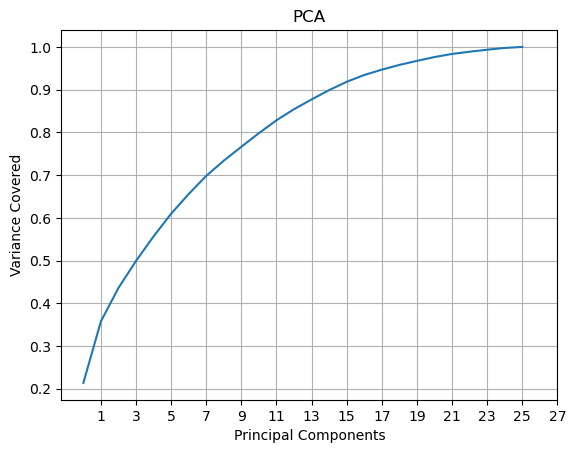

In [37]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,28, 2))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

We can see that at 21 features almost 98% of the variance is being covered so, this is the best number of features we can go ahead with.

In [37]:
pca=PCA(n_components=21)
new_comp=pca.fit_transform(X_scaled)

In [38]:
princi_comp=pd.DataFrame(new_comp)

In [39]:
princi_comp

0         1         2         3         4         5         6   \
0    -0.006848  2.804115 -2.390809  0.082901  0.190082  0.643905 -0.771453   
1    -0.983784  0.914337 -0.790622 -0.693206 -0.814008 -0.782179 -1.276130   
2    -1.306348  0.060078  0.069816 -0.728207 -0.287321 -0.521336 -1.939739   
3    -0.772571  1.027754 -2.055516 -0.252085 -1.251176 -0.448758 -0.946517   
4    -1.044695  0.970072 -0.851997 -0.528960 -1.229805 -1.185224 -0.470112   
...        ...       ...       ...       ...       ...       ...       ...   
6889 -1.912729  4.426275  3.603743 -0.373643 -0.299119  0.062228 -1.019469   
6890 -1.731869  4.632157  3.490700 -0.754394 -1.343410 -0.813434  0.334780   
6891 -1.941997  4.187361  4.147143 -1.013114 -0.786388 -0.190085  1.050706   
6892 -2.095935  3.971963  4.285977 -0.928039 -0.369595  0.231815  0.606067   
6893 -1.999252  4.055757  4.387830 -0.855976  0.073174  0.411586 -0.334172   

            7         8         9   ...        11        12        13  \
0     0.153898  0.925116  1.228288  ...  0.598985 -0.231431  1.268023   
1     0.458746  1.002062  1.450987  ...  0.361017 -0.320929  1.087820   
2     0.942814  0.860437  1.357555  ...  0.119177 -0.324443  0.848331   
3     0.168543  0.996482  1.259177  ...  1.312890 -0.086364  1.531995   
4     0.566274  0.352081  1.211384  ...  0.507416 -1.923430  0.248971   
...        ...       ...       ...  ...       ...       ...       ...   
6889  0.725980 -2.144252 -0.759716  ...  0.332572  1.499487 -0.408278   
6890  0.118237 -2.430183 -0.686157  ...  0.221443  0.055882 -0.941183   
6891 -0.420192 -1.635172 -0.436602  ...  0.466821  1.472265 -0.441194   
6892 -0.051353 -1.832124 -0.543916  ...  0.362983  1.561187 -0.421173   
6893  0.639480 -2.027826 -0.835680  ...  0.378938  1.669230 -0.416396   

            14        15        16        17        18        19        20  
0    -0.232986  1.308749  0.620941  0.221588  0.620178 -0.043437 -0.263672  
1    -0.284912  1.282069  0.379308  0.670187  0.708461  0.638413  0.215681  
2    -0.597077  1.230176  0.395990  0.885268  0.720059  0.211838 -0.011040  
3     0.018113  0.931522  0.331036  0.986556  0.594301  0.100041  0.488511  
4    -0.898471  1.668095  0.459056  0.345965  0.545161  0.304210 -0.274312  
...        ...       ...       ...       ...       ...       ...       ...  
6889 -0.375745 -0.464976 -0.665081  0.103919 -0.292723 -0.011606 -0.080468  
6890 -0.908275 -0.154982 -0.617080 -0.401673 -0.424546  0.033286 -0.378643  
6891  0.207986  0.001587 -0.360720 -0.720284 -0.182295  0.160678 -0.262069  
6892  0.042253 -0.124625 -0.469603 -0.495175 -0.246775  0.070673 -0.143335  
6893 -0.348172 -0.331351 -0.716161 -0.109115 -0.378303  0.265899  0.008730  

[6894 rows x 21 columns]

In [40]:
new_comp1=pca.fit_transform(U_scaled)

In [41]:
princi_comp1=pd.DataFrame(new_comp1)

In [42]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test=train_test_split(princi_comp, y, test_size=0.25, random_state=42)

In [44]:
y_train

7617    19.2
6352    24.2
1111    24.3
1041    22.4
3779    25.0
        ... 
4209    22.5
5774    28.7
5810    25.6
5983    26.9
999     28.3
Name: Next_Tmin, Length: 5170, dtype: float64

In [45]:
U_train,U_test,v_train,v_test=train_test_split(princi_comp1, v, test_size=0.25, random_state=42)

In [46]:
v_train

7617    29.5
6352    28.3
1111    34.0
1041    32.7
3779    32.4
        ... 
4209    30.3
5774    32.5
5810    35.1
5983    33.5
999     31.7
Name: Next_Tmax, Length: 5170, dtype: float64

In [47]:
#Model Building for Next_Tmin
#Importing libraries for regression model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
#Using Liner Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [50]:
reg.fit(X_train,y_train)

LinearRegression()

In [51]:
pred_train=reg.predict(X_train)
pred_test=reg.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train)}")
print(f" testing accuracy is {r2_score(y_test,pred_test)}")
mean_score = metrics.mean_absolute_error(y_test,pred_test)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.8221107211176171
 testing accuracy is 0.8254206992359409
Mean Absolute Error Score: 0.7424297058903429


In [52]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [83]:
for k in range(3,6):
    cv_score=cross_val_score(reg,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7758211872151982


 at 4, cross val score is 0.7886848744328661


 at 5, cross val score is 0.778606516304456




In [53]:
results = pd.DataFrame([['Linear Regression', r2_score(y_test,pred_test), mean_score]],
               columns = ['Model', 'R2 score','Mean Absolute error'])
print(results)

               Model  R2 score  Mean Absolute error
0  Linear Regression  0.825421              0.74243


In [54]:
#Using Grandient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [55]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [56]:
pred_train1=gbr.predict(X_train)
pred_test1=gbr.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train1)}")
print(f" testing accuracy is {r2_score(y_test,pred_test1)}")
mean_score1 = metrics.mean_absolute_error(y_test,pred_test1)
print("Mean Absolute Error Score:",mean_score1)

 training accuracy is 0.8808610417711571
 testing accuracy is 0.8418401092257435
Mean Absolute Error Score: 0.7079649820087723


In [87]:
for k in range(3,6):
    cv_score=cross_val_score(gbr,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7829936247058168


 at 4, cross val score is 0.8013600541286799


 at 5, cross val score is 0.793186313320957




In [57]:
model_results = pd.DataFrame([['Grandient boosting regressor', r2_score(y_test,pred_test1), mean_score1]],
               columns = ['Model', 'R2 score','Mean Absolute error'])

results = results.append(model_results, ignore_index = True)
print(results)

                          Model  R2 score  Mean Absolute error
0             Linear Regression  0.825421             0.742430
1  Grandient boosting regressor  0.841840             0.707965


In [49]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [50]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
pred_train2=rfr.predict(X_train)
pred_test2=rfr.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train2)}")
print(f" testing accuracy is {r2_score(y_test,pred_test2)}")
mean_score2 = metrics.mean_absolute_error(y_test,pred_test2)
print("Mean Absolute Error Score:",mean_score2)

 training accuracy is 0.9799140041129689
 testing accuracy is 0.8583218759725129
Mean Absolute Error Score: 0.6647818842309977


In [91]:
for k in range(3,6):
    cv_score=cross_val_score(rfr,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7748067927525047


 at 4, cross val score is 0.7866455991046483


 at 5, cross val score is 0.7841555123295658




In [61]:
model_results = pd.DataFrame([['Random Forest Regressor', r2_score(y_test,pred_test2), mean_score2]],
               columns = ['Model', 'R2 score','Mean Absolute error'])

results = results.append(model_results, ignore_index = True)
print(results)

                          Model  R2 score  Mean Absolute error
0             Linear Regression  0.825421             0.742430
1  Grandient boosting regressor  0.841840             0.707965
2       Random Forest Regressor  0.856771             0.664564


In [62]:
#Using KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [63]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [64]:
pred_train3=knn.predict(X_train)
pred_test3=knn.predict(X_test)
print(f" training accuracy is {r2_score(y_train,pred_train3)}")
print(f" testing accuracy is {r2_score(y_test,pred_test3)}")
mean_score3 = metrics.mean_absolute_error(y_test,pred_test3)
print("Mean Absolute Error Score:",mean_score3)

 training accuracy is 0.9157929813080096
 testing accuracy is 0.8666713410251561
Mean Absolute Error Score: 0.632304596069951


In [123]:
for k in range(3,6):
    cv_score=cross_val_score(knn,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is -0.03182240626829369


 at 4, cross val score is 0.11153139133910112


 at 5, cross val score is 0.06757782315521191




In [65]:
model_results = pd.DataFrame([['KNeighbors Regressor', r2_score(y_test,pred_test3), mean_score3]],
               columns = ['Model', 'R2 score','Mean Absolute error'])

results = results.append(model_results, ignore_index = True)
print(results)

                          Model  R2 score  Mean Absolute error
0             Linear Regression  0.825421             0.742430
1  Grandient boosting regressor  0.841840             0.707965
2       Random Forest Regressor  0.856771             0.664564
3          KNeighbors Regressor  0.866671             0.632305


We can see that KNeighbors Regressor model is giving the highest r2_score of 86.6% and MEA of 0.63 which is the lowest among all models however, we will not choose this model as the cross validation score shows that this cannot be a generalized model. Random Forest Regressor model works best on test data and Mean absolute score is also low. We are getting r2 score of 85.8% with this modeland Mean Absolute Error score of 0.65. At CV=4, we are getting 78.6% accuracy when actual test score is 85.8% and MAE is 0.65. Also, Gradient Boosting Regressor is performing well with 84% r2-score however, it is lower than Random Forest Regressor. Hence, Random Forest Regressor model seems to be the best model and we will move ahead with this.

In [55]:
#Hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [56]:
parameter={'max_depth':[40,50,70],
          'n_jobs':[1, 2],
          'n_estimators':[50,100]}

In [57]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=4)

In [58]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50, 70], 'n_estimators': [50, 100],
                         'n_jobs': [1, 2]})

In [59]:
GCV.best_params_

{'max_depth': 40, 'n_estimators': 100, 'n_jobs': 2}

In [60]:
Final_model=RandomForestRegressor(max_depth=40,n_estimators=100,n_jobs= 2)

In [61]:
Final_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=40, n_jobs=2)

In [62]:
pred=Final_model.predict(X_test)

In [63]:
R2s=r2_score(y_test,pred)
print(R2s*100)

85.72147137236547


In [64]:
data_n = pd.DataFrame({'Actual' : v_test, 'RFR predicted': pred})

In [65]:
data_n

Actual  RFR predicted
1347    29.8      23.056967
6895    26.6      23.946000
1806    31.8      22.969000
3111    28.7      19.678000
7307    25.5      22.880644
...      ...            ...
1053    34.8      25.304000
5670    33.1      26.625000
5811    35.1      24.697322
5645    33.1      26.791000
5062    23.6      20.062000

[1724 rows x 2 columns]

After hyper parameter tuning, we don't see much difference in the score however, we can conclude that this is a generalized model and would work well on new dataset as well.

In [125]:
#Model Building for Next_Tmax
#Using Liner Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [126]:
reg.fit(U_train,v_train)

LinearRegression()

In [141]:
pred_train4=reg.predict(U_train)
pred_test4=reg.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train4)}")
print(f" testing accuracy is {r2_score(v_test,pred_test4)}")
mean_score4 = metrics.mean_absolute_error(v_test,pred_test4)
print("Mean Absolute Error Score:",mean_score4)

 training accuracy is 0.7530389804843722
 testing accuracy is 0.7522726249006088
Mean Absolute Error Score: 1.1112766110585517


In [128]:
for k in range(3,6):
    cv_score=cross_val_score(reg,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.6780077724962984


 at 4, cross val score is 0.6932145417189851


 at 5, cross val score is 0.6829333974972129




In [142]:
results = pd.DataFrame([['Linear Regression', r2_score(v_test,pred_test4), mean_score4]],
               columns = ['Model', 'R2 score','Mean Absolute error'])
print(results)

               Model  R2 score  Mean Absolute error
0  Linear Regression  0.752273             1.111277


In [131]:
#Using Random Forest Regressor
gbr1 = GradientBoostingRegressor()
gbr1.fit(U_train,v_train)

GradientBoostingRegressor()

In [143]:
pred_train5=gbr1.predict(U_train)
pred_test5=gbr1.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train5)}")
print(f" testing accuracy is {r2_score(v_test,pred_test5)}")
mean_score5 = metrics.mean_absolute_error(v_test,pred_test5)
print("Mean Absolute Error Score:",mean_score5)

 training accuracy is 0.8348762434238317
 testing accuracy is 0.7794420726129654
Mean Absolute Error Score: 1.0628862922047224


In [133]:
for k in range(3,6):
    cv_score=cross_val_score(gbr1,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7102383703726239


 at 4, cross val score is 0.6990699922249233


 at 5, cross val score is 0.7011767119941542




In [144]:
model_results = pd.DataFrame([['Grandient boosting regressor', r2_score(v_test,pred_test5), mean_score5]],
               columns = ['Model', 'R2 score','Mean Absolute error'])

results = results.append(model_results, ignore_index = True)
print(results)

                          Model  R2 score  Mean Absolute error
0             Linear Regression  0.752273             1.111277
1  Grandient boosting regressor  0.779442             1.062886


In [52]:
#Using Random Forest Regressor
rfr1=RandomForestRegressor()
rfr1.fit(U_train,v_train)

RandomForestRegressor()

In [66]:
pred_train6=rfr1.predict(U_train)
pred_test6=rfr1.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train6)}")
print(f" testing accuracy is {r2_score(v_test,pred_test6)}")
mean_score6 = metrics.mean_absolute_error(v_test,pred_test6)
print("Mean Absolute Error Score:",mean_score6)

 training accuracy is 0.9782226846089169
 testing accuracy is 0.8343711692598272
Mean Absolute Error Score: 0.8969739594831019


In [140]:
for k in range(3,6):
    cv_score=cross_val_score(rfr1,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.6801426037705159


 at 4, cross val score is 0.6766257286500443


 at 5, cross val score is 0.6762754855874948




In [146]:
model_results = pd.DataFrame([['Random Forest Regressor', r2_score(v_test,pred_test6), mean_score6]],
               columns = ['Model', 'R2 score','Mean Absolute error'])

results = results.append(model_results, ignore_index = True)
print(results)

                          Model  R2 score  Mean Absolute error
0             Linear Regression  0.752273             1.111277
1  Grandient boosting regressor  0.779442             1.062886
2       Random Forest Regressor  0.834537             0.889973


In [148]:
#Using KNeighbors Regressor
knn1=KNeighborsRegressor()
knn1.fit(U_train,v_train)

KNeighborsRegressor()

In [149]:
pred_train7=knn1.predict(U_train)
pred_test7=knn1.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train7)}")
print(f" testing accuracy is {r2_score(v_test,pred_test7)}")
mean_score7= metrics.mean_absolute_error(v_test,pred_test7)
print("Mean Absolute Error Score:",mean_score7)

 training accuracy is 0.9169080751588281
 testing accuracy is 0.8806290961417772
Mean Absolute Error Score: 0.7691183294663573


In [151]:
for k in range(3,6):
    cv_score=cross_val_score(knn1,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.134141624898922


 at 4, cross val score is 0.18607048355920205


 at 5, cross val score is 0.18144455227119954




In [150]:
model_results = pd.DataFrame([['KNeighbors Regressor', r2_score(v_test,pred_test7), mean_score7]],
               columns = ['Model', 'R2 score','Mean Absolute error'])

results = results.append(model_results, ignore_index = True)
print(results)

                          Model  R2 score  Mean Absolute error
0             Linear Regression  0.752273             1.111277
1  Grandient boosting regressor  0.779442             1.062886
2       Random Forest Regressor  0.834537             0.889973
3          KNeighbors Regressor  0.880629             0.769118


We can see that KNeighbors Regressor model is giving the highest r2_score of 88% and MEA of 0.76 which is again the lowest among all models however, we will not choose this model as the cross validation score shows that this cannot be a generalized model(unrealistic). Random Forest Regressor model works best on test data and Mean absolute score is also low. We are getting r2 score of 83.4% with this model and Mean Absolute Error score of 0.88. At CV=3, we are getting 68%. Also, Gradient Boosting Regressor is performing well with 77% r2-score however, it is lower than Random Forest Regressor. Hence, Random Forest Regressor model seems to be the best model and we will move ahead with this.

In [67]:
#Hyper parameter tuning using GridSearchCV
parameter_1={'max_depth':[40,50,70],
          'n_jobs':[1, 2],
          'n_estimators':[50,100]}

In [68]:
GCV=GridSearchCV(RandomForestRegressor(),parameter_1,cv=3)

In [69]:
GCV.fit(U_train,v_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50, 70], 'n_estimators': [50, 100],
                         'n_jobs': [1, 2]})

In [70]:
GCV.best_params_

{'max_depth': 50, 'n_estimators': 100, 'n_jobs': 1}

In [71]:
Final_model2=RandomForestRegressor(max_depth=50,n_estimators=100,n_jobs= 1)

In [72]:
Final_model2.fit(U_train,v_train)

RandomForestRegressor(max_depth=50, n_jobs=1)

In [73]:
pred1=Final_model2.predict(U_test)

In [75]:
R2s1=r2_score(v_test,pred1)
print(R2s1*100)

83.4491211806106


In [76]:
datan_1 = pd.DataFrame({'Actual' : v_test, 'RFR predicted': pred1})

In [77]:
datan_1

Actual  RFR predicted
1347    29.8      29.844000
6895    26.6      27.589744
1806    31.8      33.214749
3111    28.7      28.277000
7307    25.5      27.094744
...      ...            ...
1053    34.8      34.206000
5670    33.1      34.339000
5811    35.1      33.993000
5645    33.1      34.036000
5062    23.6      24.899000

[1724 rows x 2 columns]

For this model as well, after hyper parameter tuning, we don't see much difference in the score however, we can conclude that this is a generalized model and would work well on new dataset as well.

In [78]:
#saving model
import joblib

In [79]:
joblib.dump(Final_model,"Next_Tmax")

['Next_Tmax']

In [80]:
joblib.dump(Final_model2,"Next_Tmin")

['Next_Tmin']